In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "Elbrit sales data.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date as the index
data.set_index('Date', inplace=True)

# Check for missing values
print(data.isnull().sum())

Unnamed: 0                 0
Sr                         0
ID                         0
Customer                   0
Primary Sales              0
Cancelled                  0
Is added to primary log    0
Against Expiry             0
Breakage                   0
Claim Offer                0
Quantity                   0
Net Rate                   0
Free Item                  0
HQ                         0
Sales Team                 0
Return for Reason          0
Sales Return               0
Sales Invoice Name         0
Rate Difference            0
Item Name                  0
Free Item Value            0
dtype: int64


18:49:59 - cmdstanpy - INFO - Chain [1] start processing
18:51:29 - cmdstanpy - INFO - Chain [1] done processing


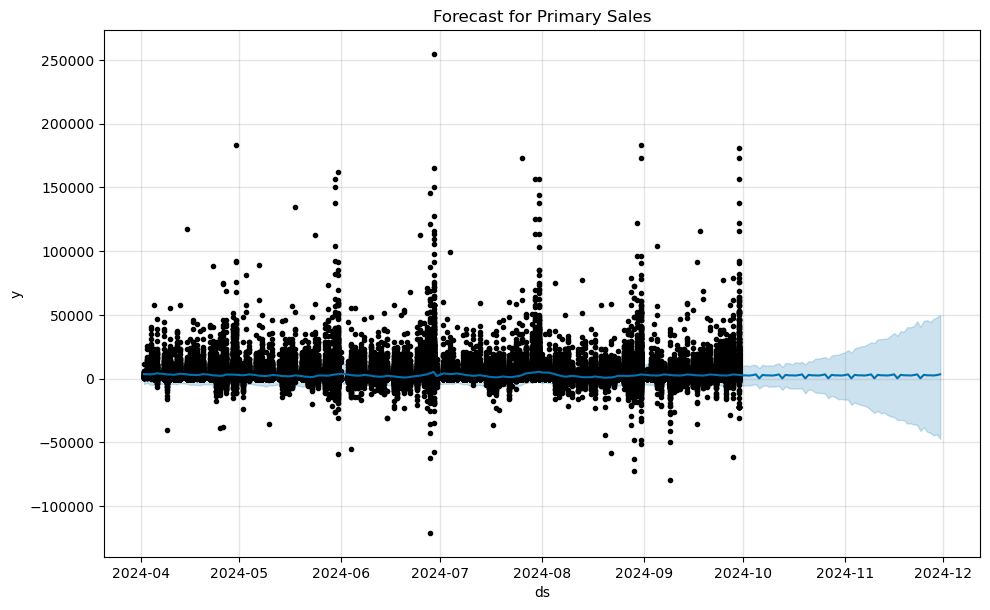

18:51:38 - cmdstanpy - INFO - Chain [1] start processing
18:52:13 - cmdstanpy - INFO - Chain [1] done processing


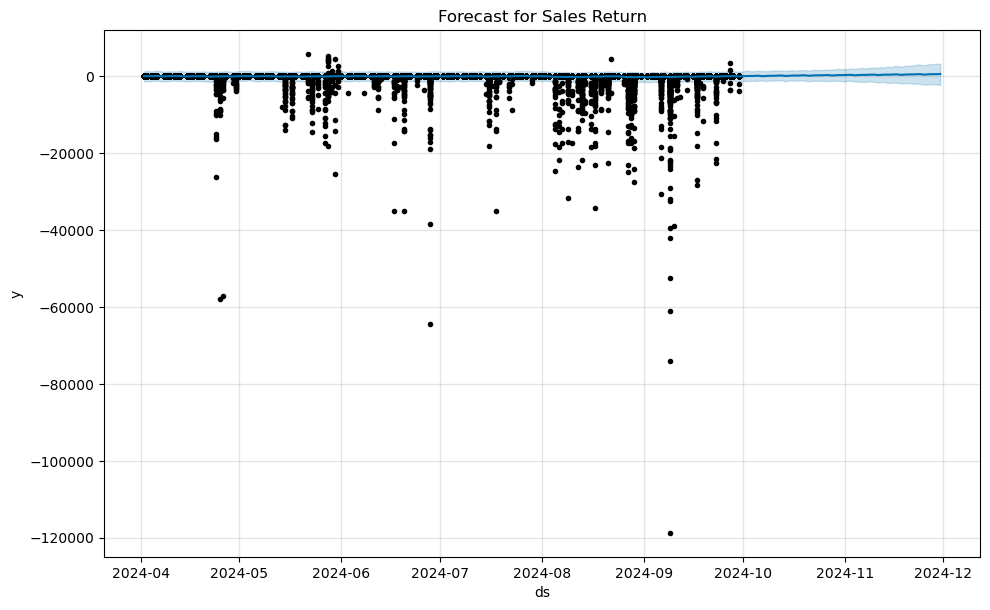

18:52:21 - cmdstanpy - INFO - Chain [1] start processing
18:52:54 - cmdstanpy - INFO - Chain [1] done processing


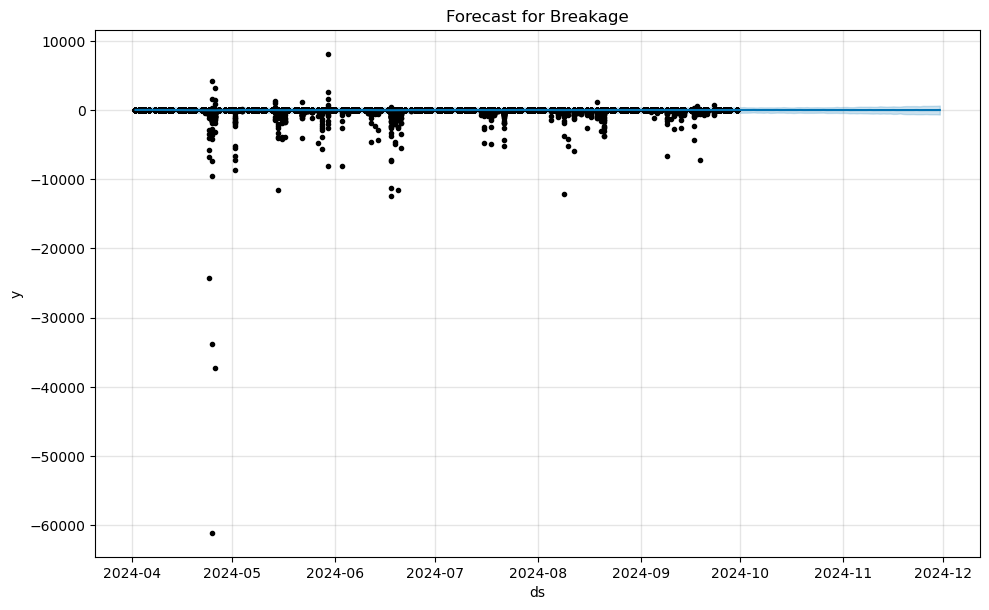

18:53:03 - cmdstanpy - INFO - Chain [1] start processing
18:54:15 - cmdstanpy - INFO - Chain [1] done processing


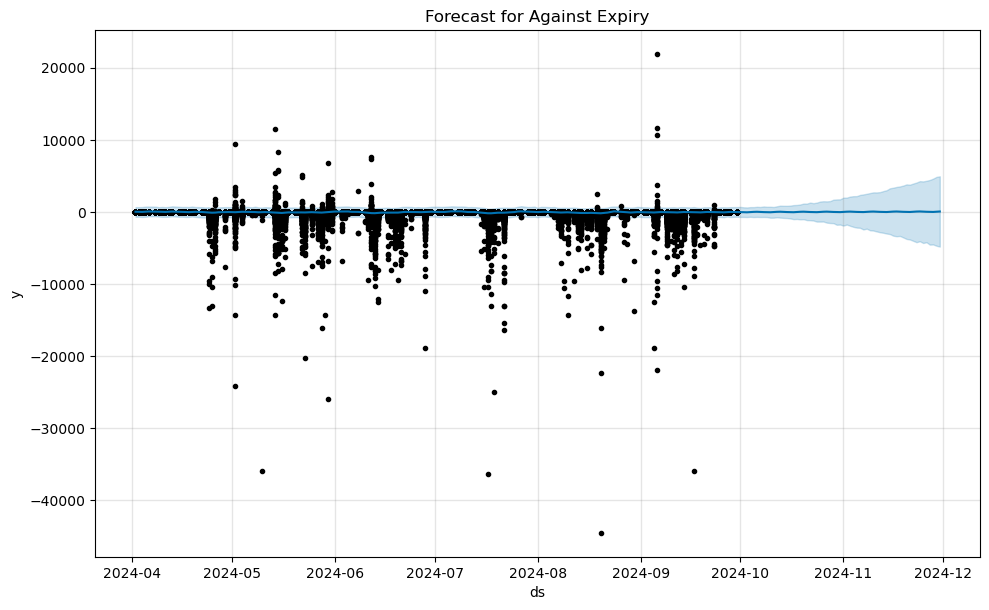

In [3]:
# Define a function to forecast a single feature
def forecast_feature(data, feature, periods):
    # Prepare data for Prophet
    feature_data = data[[feature]].reset_index().rename(columns={'Date': 'ds', feature: 'y'})
    
    # Initialize and train the model
    model = Prophet()
    model.fit(feature_data)
    
    # Create future dates
    future = model.make_future_dataframe(periods=periods)
    
    # Forecast
    forecast = model.predict(future)
    
    # Plot the forecast
    model.plot(forecast)
    plt.title(f"Forecast for {feature}")
    plt.show()
    
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Number of days to predict (October + November = 61 days)
periods = 61

# Forecast each feature
primary_sales_forecast = forecast_feature(data, 'Primary Sales', periods)
sales_return_forecast = forecast_feature(data, 'Sales Return', periods)
breakage_forecast = forecast_feature(data, 'Breakage', periods)
against_expiry_forecast = forecast_feature(data, 'Against Expiry', periods)

In [4]:
# Combine all forecasts into one DataFrame
forecasts = primary_sales_forecast[['ds']].copy()
forecasts['Primary Sales'] = primary_sales_forecast['yhat']
forecasts['Sales Return'] = sales_return_forecast['yhat']
forecasts['Breakage'] = breakage_forecast['yhat']
forecasts['Against Expiry'] = against_expiry_forecast['yhat']

# Save the forecast
forecasts.to_csv('oct_nov_forecast.csv', index=False)

# Display the combined forecast
print(forecasts.head())

          ds  Primary Sales  Sales Return   Breakage  Against Expiry
0 2024-04-02    3484.603684    -12.205009   9.097274        5.444345
1 2024-04-03    3430.210364     22.662626   5.432722       -2.390499
2 2024-04-04    3252.170467     10.524093  -1.856242      -19.670296
3 2024-04-05    3555.475974     17.716789   7.402896       12.910538
4 2024-04-06    4098.475061     61.041808  14.387445       37.046159
